# 母集団からの標本抽出シミュレーション

本章では、母集団が完全にわかっていることを前提としたシミュレーションを行う

最後の部分に、無限母集団への展開を補足している。


In [4]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%precision 3
%matplotlib inline

In [12]:
# 湖の中の魚を釣るシミュレーション
fish_10 = np.abs(np.array(np.random.randn(10)))
fish_10

array([0.06 , 0.257, 1.452, 0.88 , 1.314, 0.193, 1.527, 0.24 , 0.747,
       1.299])

In [13]:
# 単純ランダムサンプリング(サンプルサイズ = 1)
np.random.choice(fish_10, size=1, replace=False)

array([0.06])

In [14]:
# もっとたくさんサンプルがある場合
fish_100000 = pd.read_csv('./samples/3-4-1-fish_length_100000.csv')['length']
fish_100000

0        5.297442
1        3.505566
2        3.572546
3        3.135979
4        4.689275
           ...   
99995    4.158780
99996    4.818718
99997    4.060880
99998    4.271488
99999    3.396745
Name: length, Length: 100000, dtype: float64

In [15]:
# 単純ランダムサンプリング(サンプルサイズ = 10)
sampled = np.random.choice(
    fish_100000, size=10, replace=False
)
sampled

array([5.075, 3.24 , 4.849, 4.714, 3.997, 3.735, 3.301, 3.285, 4.878,
       2.994])

In [16]:
np.mean(sampled)

4.00675502023665

mean:  4.000000000000001 
std:  0.8 
var:  0.64


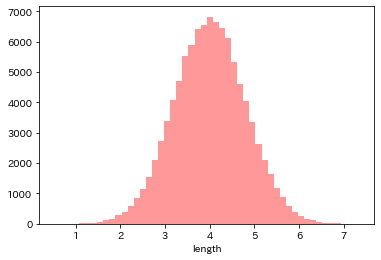

In [17]:
# 母集団分布の推定
mean = np.mean(fish_100000)
std = np.std(fish_100000, ddof=0)
var = np.var(fish_100000, ddof=0)
print('mean: ', mean, '\nstd: ', std, '\nvar: ', var)
sns.distplot(fish_100000, kde=False, color='red')

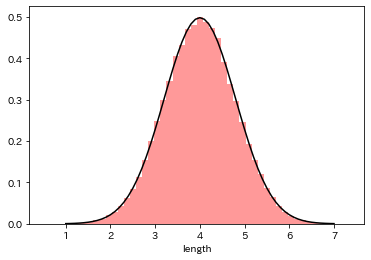

In [21]:
# 仮定を置く
# 「平均値4.00、分散0.64の正規分布」で表現できるのではないかと仮定する
# そこで、母集団分布と上記仮定した正規分布の確率密度関数を比較してみる
# 上記で描画したグラフを参考に、1~7の範囲で正規分布の確率密度関数を作る
x = np.arange(start=1, stop=7.1, step=0.1)
p_x = stats.norm.pdf(x=x, loc=4, scale=0.8)
sns.distplot(fish_100000, kde=False, color='red', norm_hist=True)
plt.plot(x, p_x, color='black')

In [23]:
# 標本が得られるプロセスの抽象化
# これまで(具体)
# > 標本を得る = fish_100000 からランダムにサンプリングする (fish_100000は平均4.0、分散0.64の正規分布)
# これから（抽象）
# > 標本を得る = 平均4.0、分散0.64の正規分布に従う乱数（=確率変数）を発生させる
# ※補足……分散0.64ということは、標準偏差は0.8

# loc:平均, scale:標準偏差, size:サンプルサイズ
np.random.normal(loc=4, scale=0.8, size=10)

array([2.898, 4.021, 4.434, 4.566, 5.424, 2.376, 4.38 , 3.898, 4.775,
       5.018])

### 【補足】
#### 有限母集団修正

- 以降、シミュレーションにより標本の特徴を明らかにしていくが、無限母集団を前提としている
- ここで取り扱った100000件のデータは無限ではない為、厳密には有限母集団修正を行う必要がある
- ただし、有限母集団であっても、サンプルサイズに対して母集団が十分大きい場合は、「有限母集団修正をする意味はほとんどない」と考えることができる
- 以降では、サンプルサイズに対して母集団が十分に大きいものと想定して進める

#### 母集団分布を正規分布とみなしてもよいのか

- 基本的に、母集団分布は何らかの分布を決め内で仮定することが多い
- 正規分布はよく用いられるが、他にも一般化線形モデルのように正規分布以外の分布を想定することもある
- 母集団の全数調査ができない以上、標本のヒストグラムを描くなどして、当たりをつけるのが普通